In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [2]:
metadata = pd.read_csv('hmp2_metadata_small.csv')
mtx = pd.read_table('MTX-2017-12-14/pathabundance_relab.tsv', index_col=0).transpose()
mtx['site_sub_coll'] = mtx.index
mtx.head()

# Pathway,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Akkermansia.s__Akkermansia_muciniphila,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_barnesiae,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_caccae,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_cellulosilyticus,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_clarus,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_coprocola,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_faecis,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_finegoldii,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_fluxus,...,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_salivarius,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_thermophilus,VALSYN-PWY: L-valine biosynthesis|g__Subdoligranulum.s__Subdoligranulum_sp_4_3_54A2FAA,VALSYN-PWY: L-valine biosynthesis|g__Subdoligranulum.s__Subdoligranulum_variabile,VALSYN-PWY: L-valine biosynthesis|g__Synergistes.s__Synergistes_sp_3_1_syn1,VALSYN-PWY: L-valine biosynthesis|g__Veillonella.s__Veillonella_atypica,VALSYN-PWY: L-valine biosynthesis|g__Veillonella.s__Veillonella_dispar,VALSYN-PWY: L-valine biosynthesis|g__Veillonella.s__Veillonella_parvula,VALSYN-PWY: L-valine biosynthesis|unclassified,site_sub_coll
CSM5FZ4M,0.015748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CSM5FZ4M
CSM5MCUO,0.007513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001084,CSM5MCUO
CSM5MCVN,0.025239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CSM5MCVN
CSM5MCW6,0.017006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CSM5MCW6
CSM5MCWC,0.002012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CSM5MCWC


In [3]:
externalID_participant = metadata[["External ID", "Participant ID"]].drop_duplicates()
participant_diagnosis= metadata[["Participant ID", "diagnosis"]].drop_duplicates()

In [4]:
mtx_part = mtx.merge(externalID_participant, how="left", left_on="site_sub_coll", right_on="External ID")
mtx_part = mtx_part.merge(participant_diagnosis, how="left", left_on="Participant ID", right_on="Participant ID")

In [5]:
mtx_part.head()

,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Akkermansia.s__Akkermansia_muciniphila,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_barnesiae,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_caccae,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_cellulosilyticus,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_clarus,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_coprocola,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_faecis,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_finegoldii,1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_fluxus,...,VALSYN-PWY: L-valine biosynthesis|g__Subdoligranulum.s__Subdoligranulum_variabile,VALSYN-PWY: L-valine biosynthesis|g__Synergistes.s__Synergistes_sp_3_1_syn1,VALSYN-PWY: L-valine biosynthesis|g__Veillonella.s__Veillonella_atypica,VALSYN-PWY: L-valine biosynthesis|g__Veillonella.s__Veillonella_dispar,VALSYN-PWY: L-valine biosynthesis|g__Veillonella.s__Veillonella_parvula,VALSYN-PWY: L-valine biosynthesis|unclassified,site_sub_coll,External ID,Participant ID,diagnosis
0,0.015748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,CSM5FZ4M,CSM5FZ4M,C3003,UC
1,0.007513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.001084,CSM5MCUO,CSM5MCUO,C3006,UC
2,0.025239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,CSM5MCVN,CSM5MCVN,C3002,CD
3,0.017006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,CSM5MCW6,CSM5MCW6,C3008,CD
4,0.002012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,CSM5MCWC,CSM5MCWC,C3009,CD


In [6]:
# prepare input (RNA abundances) and output (diagnosis) data 
MTX_X = mtx_part.iloc[:,0:6061]
MTX_y = mtx_part.iloc[:,6064]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.33, random_state=42)

In [7]:
# feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [8]:
X_train.shape

(492, 116)

## Decision Tree

In [9]:
min_samples_split_DT = [3,4,5,6,7,8,9]
min_samples_leaf_DT = [3,4,5,6,7,8,9]
max_depth_DT = [3,4,5,6,7,8,9,10]
max_features_DT = ['sqrt', 'log2', None, 1, 2, 3, 4, 5]

parameters_DT = {#'max_features':max_features_DT,
                'min_samples_split': min_samples_split_DT,
                 'max_depth': max_depth_DT,
                'min_samples_leaf': min_samples_leaf_DT
                }

DT_model = DecisionTreeClassifier(random_state = 0, class_weight="balanced")
DT_clf = GridSearchCV(DT_model, parameters_DT, cv=5, scoring='accuracy')
DT_clf.fit(X_train, y_train)

print("Best Model:")
DT_model = DT_clf.best_estimator_
print(DT_model)

DT_predictions = DT_model.predict(X_test) 
  
# creating a confusion matrix 
cm_DT = confusion_matrix(y_test, DT_predictions)
cm_DT

Best Model:
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


D:\defne\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([[40, 38, 23],
       [13, 47,  6],
       [11, 17, 48]], dtype=int64)

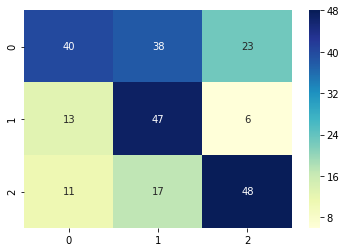

In [10]:
sns.heatmap(cm_DT,  cmap="YlGnBu", annot=True)

## Logistic Regression

In [11]:
penalty_list_LR = ['l1','l2']
regularization_list_LR = [i for i in np.logspace(-4,2,15)]
parameters_LR = {'penalty':penalty_list_LR,
                'C': regularization_list_LR}

LR_model = LogisticRegression(class_weight = 'balanced')
LR_clf = GridSearchCV(LR_model, parameters_LR, cv=5, scoring="accuracy")

LR_model = LogisticRegression(random_state = 0, class_weight="balanced")
LR_clf = GridSearchCV(LR_model, parameters_LR, cv=5, scoring='accuracy')
LR_clf.fit(X_train, y_train)

print("Best Model:")
LR_model = LR_clf.best_estimator_
print(LR_model)

LR_predictions = LR_model.predict(X_test) 
  
# creating a confusion matrix 
cm_LR = confusion_matrix(y_test, LR_predictions)
cm_LR

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

Best Model:
LogisticRegression(C=0.013894954943731374, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


array([[78, 14,  9],
       [27, 29, 10],
       [23,  5, 48]], dtype=int64)

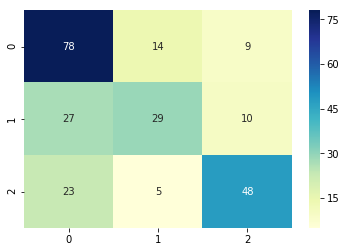

In [12]:
sns.heatmap(cm_LR, cmap="YlGnBu", annot=True)

## SVM

In [13]:
penalty_list_SVM = ['l1','l2']
regularization_list_SVM = [i for i in np.logspace(-4,-1,15)]
parameters_SVM = {'penalty':penalty_list_SVM,
                'C': regularization_list_SVM}

SVM_model = LinearSVC(class_weight = 'balanced', multi_class="crammer_singer")
SVM_clf = GridSearchCV(SVM_model, parameters_SVM, cv=5, scoring="accuracy")

SVM_clf.fit(X_train, y_train)

print("Best Model:")
SVM_model = SVM_clf.best_estimator_
print(SVM_model)

SVM_predictions = SVM_model.predict(X_test) 
  
# creating a confusion matrix 
cm_SVM = confusion_matrix(y_test, SVM_predictions)
cm_SVM

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

Best Model:
LinearSVC(C=0.013894954943731374, class_weight='balanced', dual=True,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=1000, multi_class='crammer_singer', penalty='l1',
          random_state=None, tol=0.0001, verbose=0)


D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will 

array([[80, 12,  9],
       [27, 29, 10],
       [25,  6, 45]], dtype=int64)

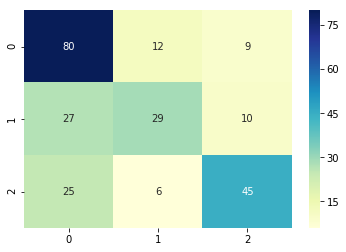

In [14]:
sns.heatmap(cm_SVM, cmap="YlGnBu", annot=True)

## Gaussian NB

In [15]:
from sklearn.naive_bayes import GaussianNB

var_smooth_NB = [i for i in np.logspace(-12,-6,20)]

parameters_NB = {'var_smoothing':var_smooth_NB}

NB_model = GaussianNB()
NB_clf = GridSearchCV(NB_model, parameters_NB, cv=5, scoring="accuracy")

NB_clf.fit(X_train, y_train)

print("Best Model:")
NB_model = NB_clf.best_estimator_
print(NB_model)

NB_predictions = NB_model.predict(X_test) 
  
# creating a confusion matrix 
cm_NB = confusion_matrix(y_test, NB_predictions)
cm_NB

Best Model:
GaussianNB(priors=None, var_smoothing=2.3357214690901212e-07)


array([[93,  6,  2],
       [35, 24,  7],
       [36, 11, 29]], dtype=int64)

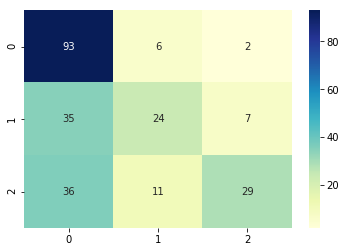

In [16]:
sns.heatmap(cm_NB, cmap="YlGnBu", annot=True)

## KNN

In [17]:
nneighbors_KNN = [i+2 for i in range(10)]
weights_list_KNN = ['uniform', 'distance']
parameters_KNN = {'n_neighbors':nneighbors_KNN,
                'weights': weights_list_KNN}
KNN_model = KNeighborsClassifier()
KNN_clf = GridSearchCV(KNN_model, parameters_KNN, cv=5, scoring="accuracy")

KNN_clf.fit(X_train, y_train)

print("Best Model:")
KNN_model = KNN_clf.best_estimator_
print(KNN_model)

KNN_predictions = KNN_model.predict(X_test) 
  
# creating a confusion matrix 
cm_KNN = confusion_matrix(y_test, KNN_predictions)
cm_KNN

Best Model:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')


D:\defne\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([[78, 17,  6],
       [25, 36,  5],
       [30,  7, 39]], dtype=int64)

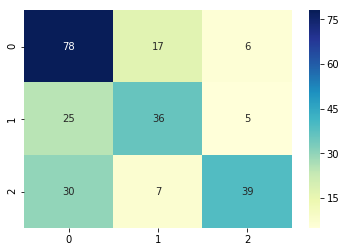

In [18]:
sns.heatmap(cm_KNN, cmap="YlGnBu", annot=True)

## RF

In [19]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [ None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=2, random_state=0)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring="accuracy")

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test) 
  
# creating a confusion matrix 
cm_RF = confusion_matrix(y_test, RF_predictions)
cm_RF

Best Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


array([[85,  9,  7],
       [33, 29,  4],
       [23,  4, 49]], dtype=int64)

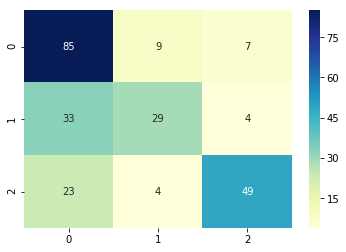

In [20]:
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

## MLP

In [21]:
alpha_MLP = [i for i in 10.0 ** -np.arange(1,7)]
hidden_layer_sizes_MLP = [(10,10), (20,20), (40,40), 
                     (10,20),(10,40),(20,10), (40,10)]
parameters_MLP = {'alpha': alpha_MLP,
                 'hidden_layer_sizes': hidden_layer_sizes_MLP}

MLP_model = MLPClassifier(solver='lbfgs', 
                    random_state=1)
MLP_clf = GridSearchCV(MLP_model, parameters_MLP, cv=5, scoring="accuracy")

MLP_clf.fit(X_train, y_train)

print("Best Model:")
MLP_model = MLP_clf.best_estimator_
print(MLP_model)

MLP_predictions = MLP_model.predict(X_test) 
  
# creating a confusion matrix 
cm_MLP = confusion_matrix(y_test, MLP_predictions)
cm_MLP

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Model:
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


array([[78, 18,  5],
       [16, 41,  9],
       [20, 17, 39]], dtype=int64)

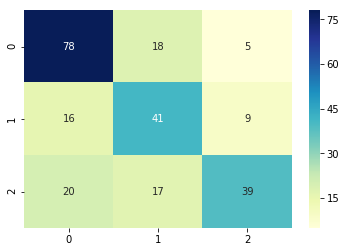

In [22]:
sns.heatmap(cm_MLP, cmap="YlGnBu", annot=True)

## Consensus

In [23]:
allclf_train = pd.DataFrame({'diagnosis':y_train})

allclf_train['DT'] = DT_clf.best_estimator_.predict(X_train)
allclf_train['KNN'] = KNN_clf.best_estimator_.predict(X_train)
allclf_train['SVC'] = SVM_clf.best_estimator_.predict(X_train)
allclf_train['LR'] = LR_clf.best_estimator_.predict(X_train)
allclf_train['RF'] = RF_clf.best_estimator_.predict(X_train)
allclf_train['MLP'] = MLP_clf.best_estimator_.predict(X_train)
allclf_train

,diagnosis,DT,KNN,SVC,LR,RF,MLP
89,nonIBD,CD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD
557,CD,CD,CD,CD,CD,CD,CD
362,CD,CD,CD,CD,CD,CD,CD
431,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD
699,CD,CD,CD,CD,CD,CD,CD
594,CD,nonIBD,CD,CD,CD,CD,CD
550,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD
424,CD,UC,CD,CD,CD,CD,CD
712,UC,UC,UC,UC,UC,UC,UC
11,UC,UC,UC,UC,UC,UC,UC


In [24]:
allclf_test = pd.DataFrame({'diagnosis':y_test})

allclf_test['DT'] = DT_clf.best_estimator_.predict(X_test)
allclf_test['KNN'] = KNN_clf.best_estimator_.predict(X_test)
allclf_test['SVC'] = SVM_clf.best_estimator_.predict(X_test)
allclf_test['LR'] = LR_clf.best_estimator_.predict(X_test)
allclf_test['RF'] = RF_clf.best_estimator_.predict(X_test)
allclf_test['MLP'] = MLP_clf.best_estimator_.predict(X_test)

In [32]:
allclf_train['Consensus'] = allclf_train[['DT', 'KNN', 'SVC', 'LR', 'RF', 'MLP']].mode(axis=1).iloc[:,0]
allclf_test['Consensus'] = allclf_test[['DT', 'KNN', 'SVC', 'LR', 'RF', 'MLP']].mode(axis=1).iloc[:,0]

In [34]:
cm_Consensus_train = confusion_matrix(y_train, allclf_train['Consensus'])
cm_Consensus_test = confusion_matrix(y_test, allclf_test['Consensus'])

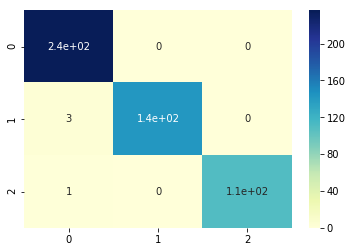

In [50]:
sns.heatmap(cm_Consensus_train, cmap="YlGnBu", annot=True)
plt.savefig("Consensus_Train.svg")

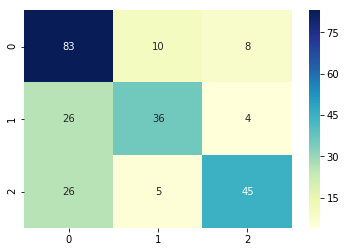

In [51]:
sns.heatmap(cm_Consensus_test, cmap="YlGnBu", annot=True)
plt.savefig("Consensus_Test.svg")

In [37]:
allclf_test.shape

(243, 8)

In [46]:
print("Accuracy:", accuracy_score(y_test, allclf_test['Consensus']))
print("F1 eachclass:", f1_score(y_test, allclf_test['Consensus'], average=None))
print("F1 weighted average:", f1_score(y_test, allclf_test['Consensus'], average="weighted"))


Accuracy: 0.6748971193415638
F1 eachclass: [0.70338983 0.61538462 0.67669173]
F1 weighted average: 0.6711371560712426


## Bigger MLP

Best Model:
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 100, 100, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


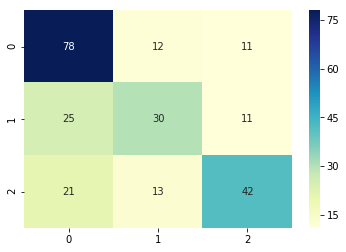

In [49]:
alpha_MLP = [i for i in 10.0 ** -np.arange(1,7)]

parameters_MLP = {'alpha': alpha_MLP}

MLP_model = MLPClassifier(solver='lbfgs', 
                    random_state=1, hidden_layer_sizes=(20,100,100,20))
MLP_clf = GridSearchCV(MLP_model, parameters_MLP, cv=5, scoring="accuracy")

MLP_clf.fit(X_train, y_train)

print("Best Model:")
MLP_model = MLP_clf.best_estimator_
print(MLP_model)

MLP_predictions = MLP_model.predict(X_test) 
  
# creating a confusion matrix 
cm_MLP = confusion_matrix(y_test, MLP_predictions)
cm_MLP

sns.heatmap(cm_MLP, cmap="YlGnBu", annot=True)